-------
<h2> Table of Contents </h2>
    
<ol style= "color:red;
            font-size:20px;">
    <li> Import Required Libraries</li>
    <li> Read Dataset</li>
    <li> Get some information about the data</li>
    <li> Data Cleaning</li>
    <li> Data Visualization & analysing the Data</li>
    <li> Insights </li>

</ol>




----
## **Import Libraries**


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-----
## Read Data

In [7]:
df=pd.read_csv(r"/content/train.csv")

----
## **Taking information about the data**

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
df.shape

(9800, 18)

----
## Data Cleaning

In [35]:
df.describe()

,Order Date,Ship Date,Postal Code,Sales
count,9799,9799,9799.000000,9799.000000
mean,2017-05-01 07:02:29.525461760,2017-05-05 06:06:30.162261504,55218.566690,230.763895
min,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2016-05-24 12:00:00,2016-05-28 00:00:00,23223.000000,17.248000
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,57701.000000,54.480000
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.572000
max,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,NaN,NaN,32068.158155,626.683644


In [36]:
#getting names of every columns
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
# Remove unnecassary Columns

df.drop(['Row ID','Order ID','Customer ID','Customer Name'],axis=1,inplace=True)

In [11]:
# Display the duplicated rows

df[df.duplicated()]

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,23/04/2015,27/04/2015,Standard Class,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [12]:
# Remove Duplicates

df.drop_duplicates(inplace=True)

In [13]:
# get the number of nulls in each column

df.isna().sum()

,0
Order Date,0
Ship Date,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,11
Region,0
Product ID,0


<p style="color:red;
          font-size:20px;"> --> There are 11 Nulls in Postal Code Column </p>

In [14]:
# display the rows which have nulls

df[df.isnull().any(axis=1)]

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [15]:
# I take the code of Vermont state from google -----> 05401 , and fill the nulls by it

df['Postal Code'].fillna(5401,inplace=True)

In [16]:
# Now there should be no nulls
df.isna().sum().sum()

0

In [17]:
#Date and time format is not correct so I modify it

df['Order Date']=pd.to_datetime(df['Order Date'],format="%d/%m/%Y")
df['Ship Date']=pd.to_datetime(df['Ship Date'],format="%d/%m/%Y")

# Now I change the type of Postal Code column from float to integer
df['Postal Code']=df['Postal Code'].astype('int')

## **Data Visualization &  Analysis**

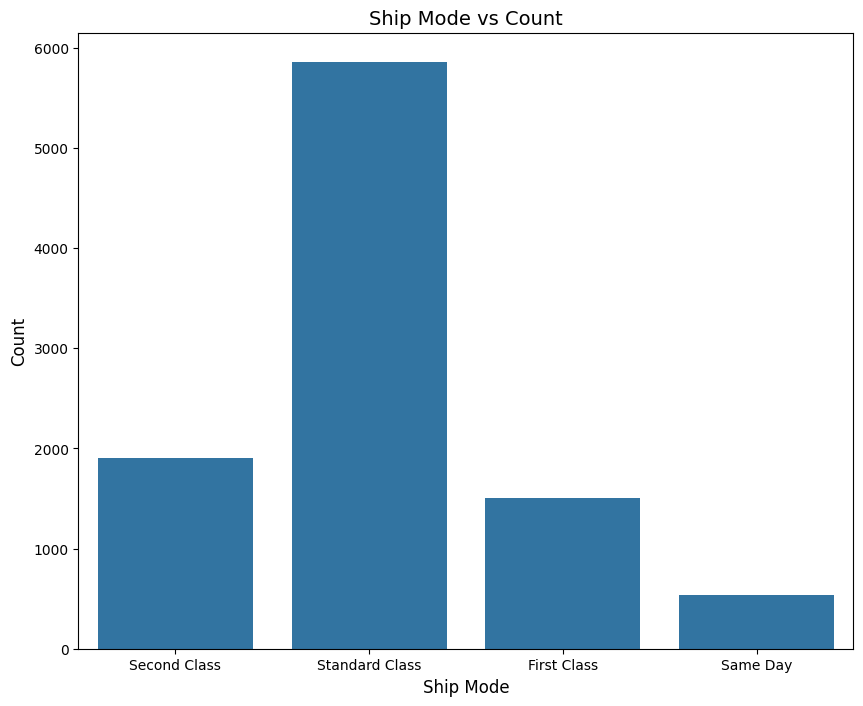

In [18]:
# 1. Ship Mode vs Count

plt.figure(figsize=(10,8))
sns.countplot(x=df['Ship Mode'])

#Now will give labelling
plt.xlabel('Ship Mode',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Ship Mode vs Count',fontsize=14)
plt.show()

### <font color='red'> Result </font>: Ship Mode of most of the Orders is Standard Class


In [19]:
# 2. Segment vs Count

fig=px.pie(df,values=np.ones(9799),names='Segment',color_discrete_sequence=px.colors.sequential.RdBu,title='Segment')
fig.show()

### <font color='red'> Result </font>:  Most of the Orders are from Consumers


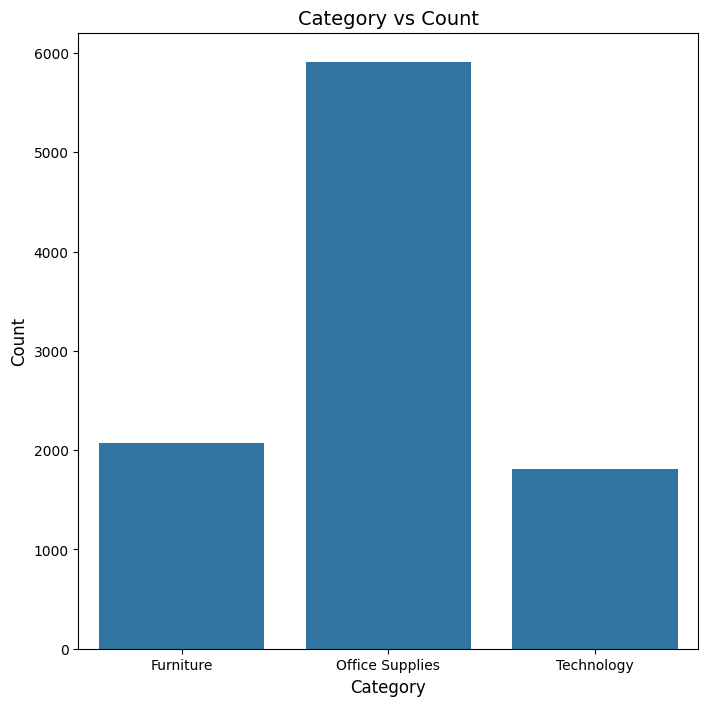

In [20]:
# 3. Category vs Count

plt.figure(figsize=(8,8))
sns.countplot(x=df['Category'])

#Labeling
plt.xlabel('Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Category vs Count',fontsize=14)
plt.show()

### <font color='red'> Result </font>: Most of the Orders in Category are Office Supplies


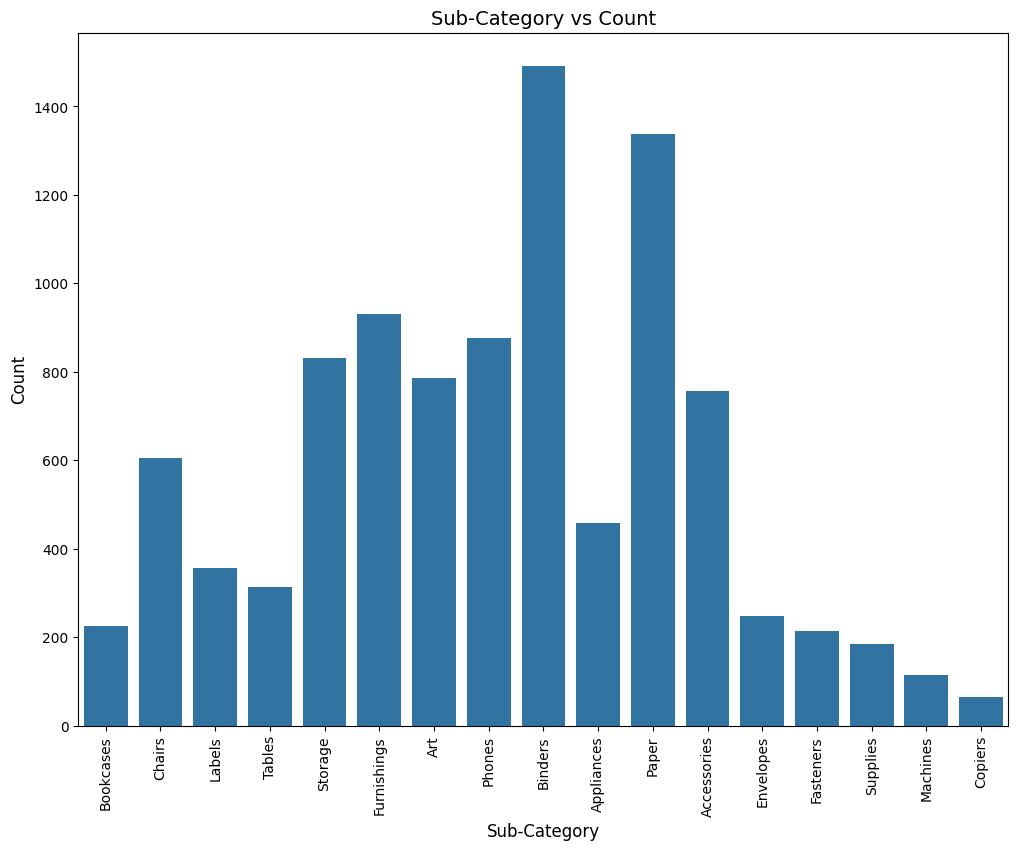

In [21]:
# Sub-Category vs Count

plt.figure(figsize=(12,9))
sns.countplot(x=df['Sub-Category'])

#Labeling
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Sub-Category vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

### <font color='red'> Result </font>: Most of the Orders in Sub_Category are Binders and Papers


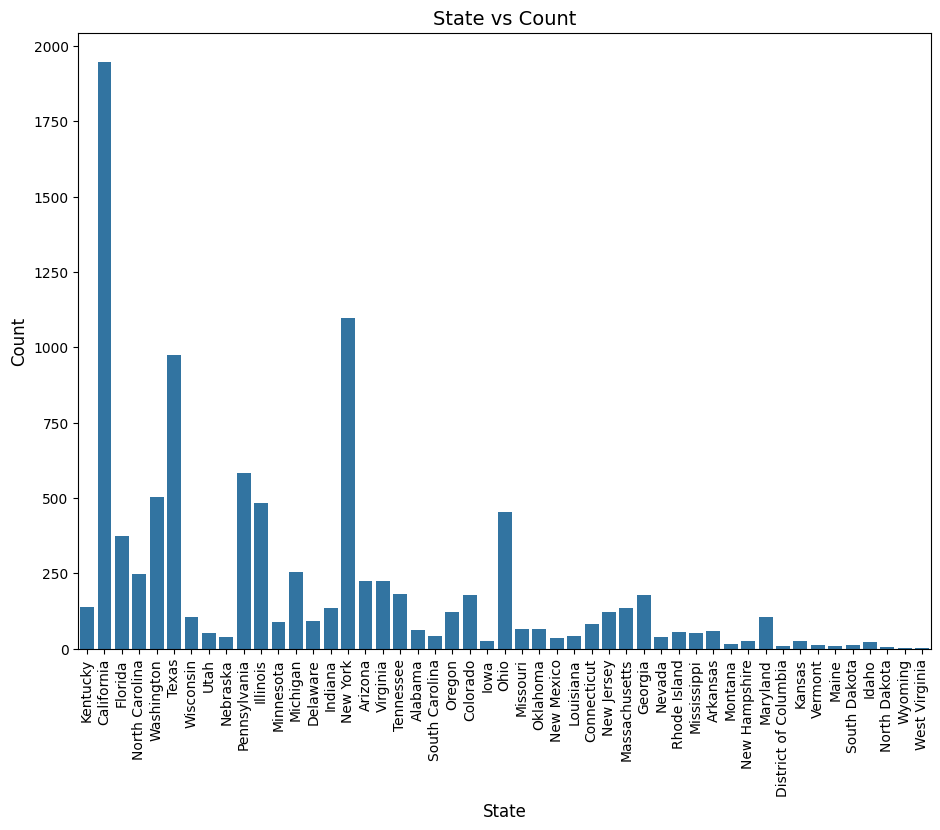

In [22]:
# 4. State vs Count

plt.figure(figsize=(11,8))
sns.countplot(x=df['State'])
#Labeling
plt.xlabel('State',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('State vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()
#city count is so much.

### <font color='red'> Result </font>: Most of the Orders are from California and New York States

In [23]:
# Now some other data insight

# Sales of the Top 15 States
top_states=df.groupby(['State']).sum('Sales').sort_values('Sales',ascending=False).head(15)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)
top_states

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,74848.98
9,Virginia,70636.72


In [24]:
# Printing top 15 States vs Sales

fig=px.bar(top_states,x='State',y='Sales',title='Top 15 States vs Sales',height=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from California and New York States

In [25]:
#Now city wise
# Sales of the Top 15 Cities

top_cities=df.groupby(['City']).sum('Sales').sort_values('Sales',ascending=False).head(15)
top_cities=top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities


,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


In [26]:
# Top 15 Cities vs Sales

fig=px.bar(top_cities,x='City',y='Sales',title='Top 15 Cities vs Sales',height=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from New York City and Los Angeles

In [27]:
# Insights from different cities
# Sales of the Categories

Categories=df.groupby('Category').sum('Sales').sort_values('Sales',ascending=False)
Categories=Categories[['Sales']].round(2)
Categories.reset_index(inplace=True)
Categories

,Category,Sales
0,Technology,827455.87
1,Furniture,728377.20
2,Office Supplies,705422.33


In [28]:
# Category vs Sales

fig=px.pie(Categories,names='Category',values='Sales',title='Category vs Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from Technology Products

In [29]:
# Sales of the Segments

Segments= df.groupby("Segment").sum('Sales').sort_values("Sales",ascending=False)
Segments= Segments[['Sales']].round(2)
Segments.reset_index(inplace=True)
Segments

,Segment,Sales
0,Consumer,1148060.53
1,Corporate,688494.07
2,Home Office,424700.80


In [30]:
# Segment vs Sales

fig=px.pie(Segments,names='Segment',values='Sales',title='Segment vs Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from Consumers

In [31]:
# Sales of the Regions

Regions=df.groupby('Region').sum('Sales').sort_values('Sales',ascending=False)
Regions=Regions[['Sales']].round(2)
Regions.reset_index(inplace=True)
Regions

,Region,Sales
0,West,710219.68
1,East,669237.35
2,Central,492646.91
3,South,389151.46


In [32]:
# Region vs Sales

fig=px.pie(Regions,names='Region',values='Sales',title='Region vs Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from West Region

In [33]:
# Sales of Top 10 Products

Products=df.groupby('Product Name').sum('Sales').sort_values('Sales',ascending=False).head(10)
Products=Products[['Sales']].round(2)
Products.reset_index(inplace=True)
Products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
6,Hewlett Packard LaserJet 3310 Copier,18839.69
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90
8,GBC DocuBind P400 Electric Binding System,17965.07
9,High Speed Automatic Electric Letter Opener,17030.31


### <font color='red'> Result </font>: The Canon imageCLASS 2200 Advanced Copier Product acheived the most Sales

**Now some Multivaariate analysis**

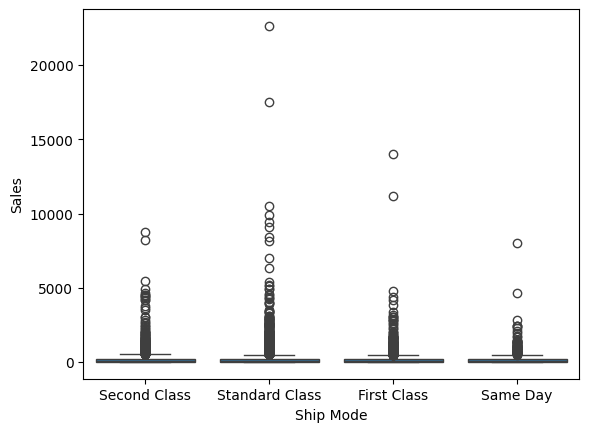

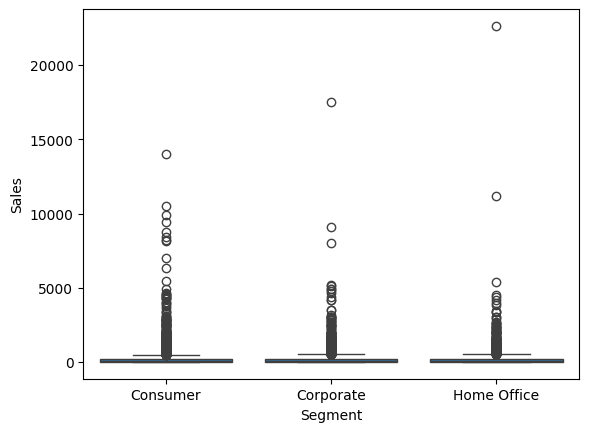

In [37]:
# 1. Boxplot of Sales vs Ship Mode
sns.boxplot(x='Ship Mode', y='Sales', data=df)
plt.show()

# 2.  Boxplot of Sales vs Segment
sns.boxplot(x='Segment', y='Sales', data=df)
plt.show()


In [38]:
#  Pivot table for Sales by Region and Category
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
print(pivot_table)


Category    Furniture  Office Supplies  Technology
Region                                            
Central   160317.4622       163590.243  168739.208
East      206180.0160       199940.811  263116.527
South     116531.4800       124424.771  148195.208
West      245348.2455       217466.509  247404.930


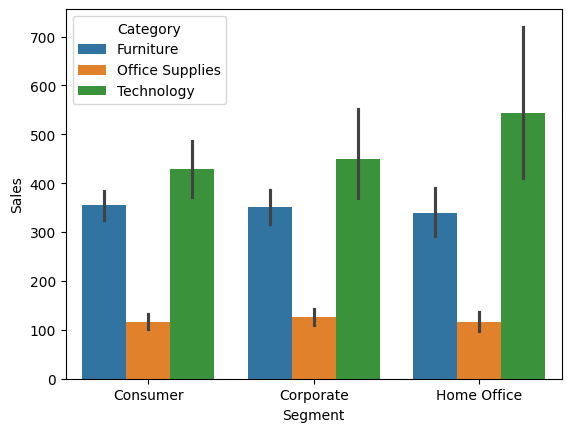

In [40]:
# 4. Sales by Segment and Category
sns.barplot(x='Segment', y='Sales', hue='Category', data=df)
plt.show()


### Results:
- **Observation**: Most of the Sales are from the **Technology segment** followed by **Furniture**.

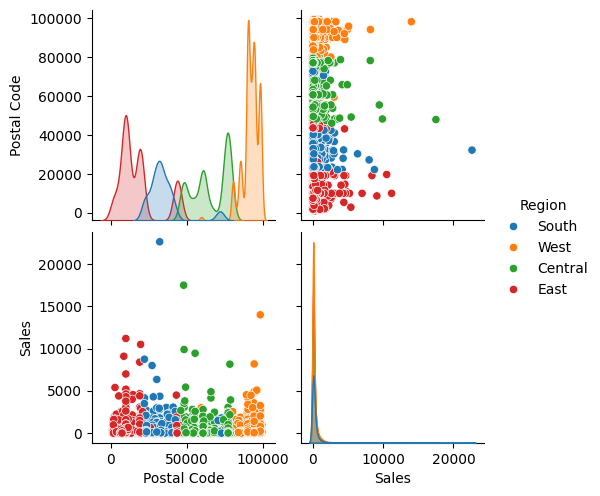

In [41]:
# 5. Pair plot for numerical columns
sns.pairplot(df, hue='Region')
plt.show()


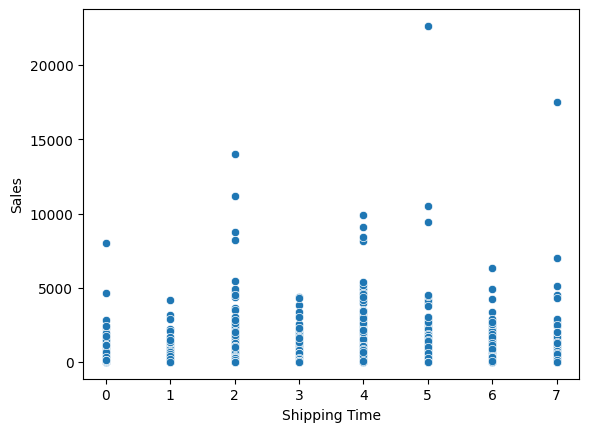

In [42]:
# Analysis of Shipping Time (Order Date vs Ship Date)

# Calculate shipping time
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Scatter plot of Sales vs Shipping Time
sns.scatterplot(x='Shipping Time', y='Sales', data=df)
plt.show()


## <font color=red> Insights </font>
<ul style= "color:brown;
            font-size:18px;">
    <li> The majority of orders are shipped via Standard Class.</li>
    <li> Most of the orders come from Consumer segment customers.</li>
    <li> Office Supplies is the most frequently ordered category.</li>
    <li> The most ordered sub-categories are Binders and Papers.</li>
    <li> California and New York contribute the highest number of orders.</li>
    <li> California and New York also generate the most sales revenue.</li>
    <li> New York City and Los Angeles are the top-performing cities in sales.</li>
    <li> Technology products contribute the highest share of total sales.</li>
    <li> Consumers account for the largest portion of total sales.</li>
    <li> The West region dominates in sales volume.</li>
    <li> The Canon imageCLASS 2200 Advanced Copier is the highest-selling product.</li>
</ul>
